In [17]:
import pandas as pd
import mido
import ast
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob
import os


In [18]:
scores_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM_stimuli/stim_scripts/train_analysis/scores'
files = sorted(glob.glob(os.path.join(scores_dir,'*.csv')))

In [19]:
df_scores = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    df_scores = pd.concat([df_scores, df])

subjects = df_scores['subject'].unique()


In [20]:
def ave_score(score_df, period):
    means = []
    for subject in df_scores['subject'].unique():
        if period == 'pre':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']<=82)]['score'])
        elif period == 'post':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']>=82)]['score'])
        elif period == 'beginning1': 
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']<=10)]['score'])
        elif period == 'beginning2': 
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']>=82)& (df_scores['trial_number']<=92)]['score'])

        elif period == 'all':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject)]['score'])
        else:
            print('Valid periods are pre, post, and all')
            
        means.append(mean_sub)

    return means

In [21]:
means_pre = ave_score(df_scores, 'pre')
means_post = ave_score(df_scores, 'post')
means_pre_10 = ave_score(df_scores, 'beginning1')

In [22]:
means_pre_10

[3.81, 4.0, 3.7399999999999998, 3.3200000000000003, 3.6700000000000004]

Text(0, 0.5, 'Mean score')

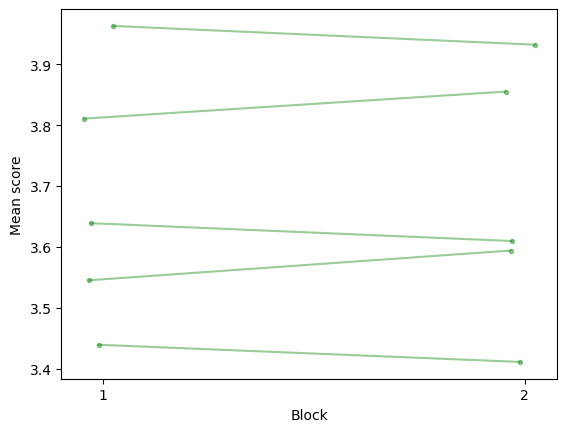

In [23]:
for i in range(len(means_pre)):
    jitter = np.random.uniform(-0.05,0.05)
    x = [1+jitter,2+jitter] 
    plt.plot(x, [means_pre[i], means_post[i]], marker = 'o',markersize = 3, color = 'green', alpha = 0.4)


#plt.scatter(x, [np.mean(means_pre), np.mean(means_post)], color = 'green')
plt.xticks([1,2])
plt.xlabel('Block')
plt.ylabel('Mean score')

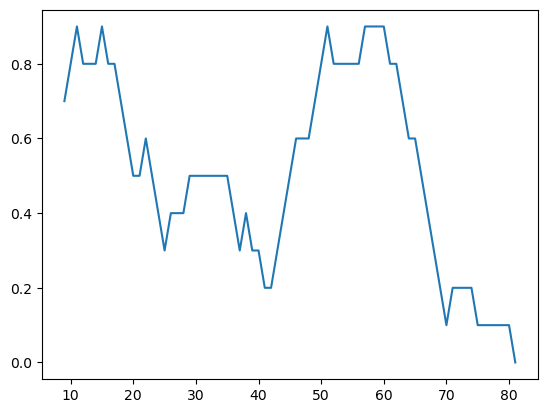

In [25]:
smoothness = 10
rolling_corr = df_scores[(df_scores['block']==1) & (df_scores['subject'] == 1)]['correct'].rolling(smoothness).mean()
plt.plot(rolling_corr, label = 1)

Text(0, 0.5, 'Rolling average score over 10 trials')

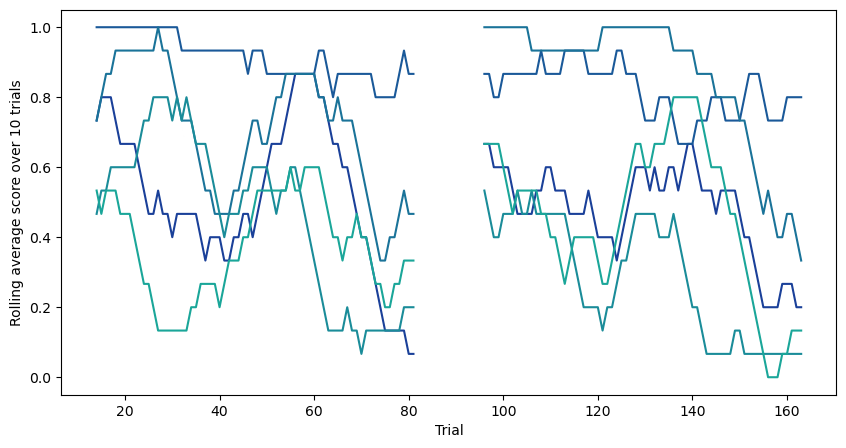

In [27]:
#rolling ave over trials
smoothness = 15

plt.figure(figsize=(10,5))

k = 0.25

for subject in subjects:
    colour = [0.1, k, 0.6]
    k+=0.1
    for i in range(2):
        rolling_corr = df_scores[(df_scores['block']==i+1) & (df_scores['subject'] == subject)]['correct'].rolling(smoothness).mean()
        plt.plot(rolling_corr, label = subject, color = colour)


plt.xlabel("Trial")
plt.ylabel("Rolling average score over 10 trials")
   

([<matplotlib.axis.XTick at 0x16a6d8100>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

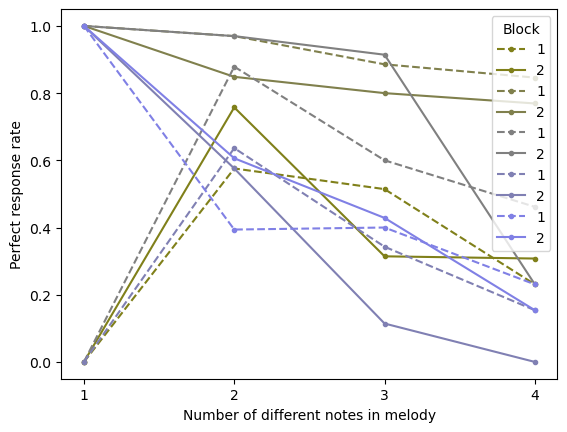

In [46]:
#scores sorted by difficulty
sub_colour = 0.1
for subject in subjects:
    for block in range(1,3):
        res_temp = df_scores[(df_scores['block']==block) & (df_scores['subject'] ==subject)]

        diff_score = []
        for i in range(1,5):
            diff = res_temp[res_temp['type'] == i]
            diff_score.append(np.mean(diff['correct']))
            #score = np.mean(diff['correct'])
            #plt.scatter(i, score, c = (0.5, 0.5, float(block)/5), cmap='blues')
        if block == 1:
            block_style = '--'
        elif block ==2:
            block_style = '-'
        plt.plot(np.arange(1, 5, 1), diff_score, c = (0.5, 0.5, sub_colour), marker = '.', linestyle = block_style, label = block)
    sub_colour +=0.2

plt.legend(loc = 'upper right', title = "Block")
plt.ylabel('Perfect response rate')
plt.xlabel('Number of different notes in melody')
plt.xticks(np.arange(1, 5, 1))